In [1]:
import warnings
import pandas as pd

from utils.LabelsDict import tickers
from utils.load_data import *
from utils.logger import Logger

warnings.filterwarnings("ignore", category=UserWarning, message="Unable to import Axes3D")

from utils.portfolio import Portfolio

log = Logger(__name__).get_logger()

!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
tickers_list = [
    'GAZP', 'LKOH', 'ROSN',
    'SBER', 'VTBR', 'MOEX',
    'GMKN', 'NLMK', 'RUAL',
    'MTSS', 'RTKM', 'TTLK',
    'MGNT', 'LNTA', 'FESH',
] 

calc = Portfolio(
    dt_calc='30.10.2024',                                     # дата, до которой выгружаются данные
    dt_start='03.11.2019',                                    # максимальная глубина, которая есть на Финам
    stocks_step=10,                                           # указвыаем, что нужны месячные данные
    tickers_list=[
        'GAZP', 'LKOH', 'ROSN',
        'SBER', 'VTBR', 'MOEX',
        'GMKN', 'NLMK', 'RUAL',
        'MTSS', 'RTKM', 'TTLK',
        'MGNT', 'LNTA', 'FESH',
    ] 
)

2025-05-01 21:30:33,572:utils.portfolio:INFO: ============================================================
2025-05-01 21:30:33,574:utils.portfolio:INFO: ANALYSIS STARTED | Python 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0] | Matplotlib 3.10.1
2025-05-01 21:30:33,577:utils.portfolio:INFO: ============================================================
2025-05-01 21:30:33,585:utils.portfolio:INFO: Stocks data loaded from backup | Records: 855
2025-05-01 21:30:33,960:utils.portfolio:INFO: Multipliers data loaded | Features: ['ticker', 'year', 'quarter', 'EV/EBITDA', 'P/BV', 'P/E', 'P/FCF', 'P/S', 'Долг, млрд руб', 'Долг/EBITDA', 'Капитализация, млрд руб', 'Чистый долг, млрд руб']
2025-05-01 21:30:33,967:utils.portfolio:INFO: Portfolio created | Companies: 15
2025-05-01 21:30:33,998:utils.portfolio:INFO: Column types adjusted: ['Долг, млрд руб', 'Капитализация, млрд руб', 'Чистый долг, млрд руб', 'high', 'low', 'close', 'EV/EBITDA', 'P/BV', 'P/E', 'P/S', 'open', 'Долг/EBITDA']
2025-05-

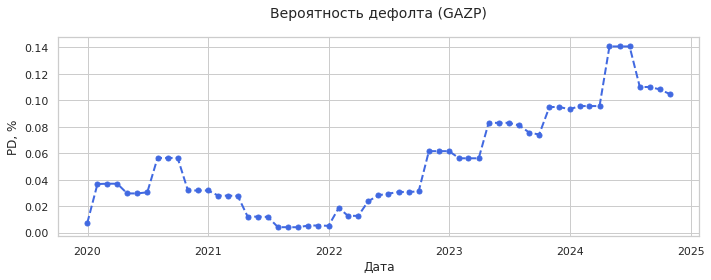

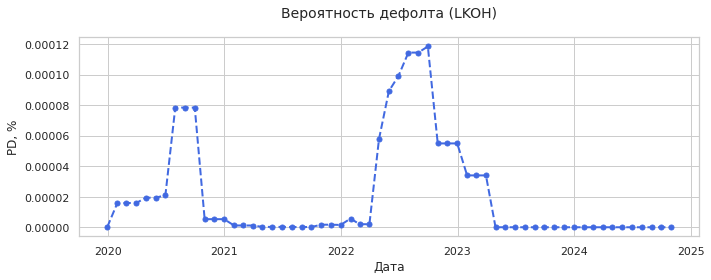

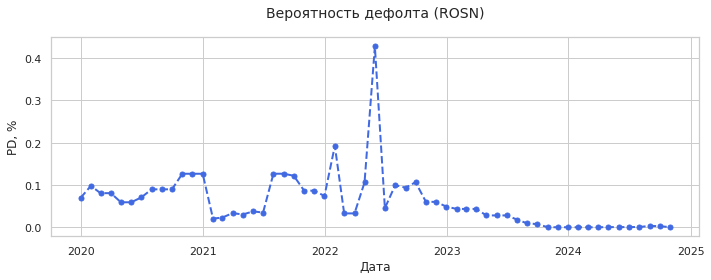

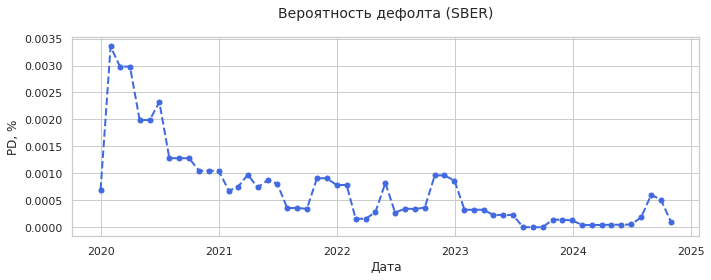

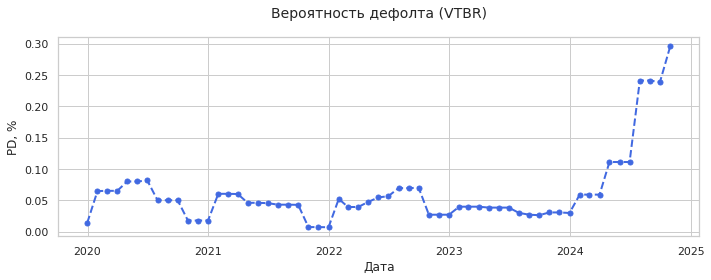

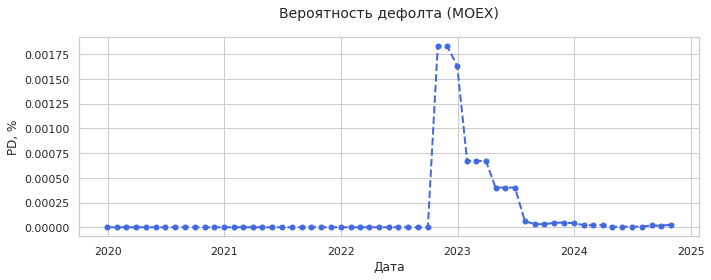

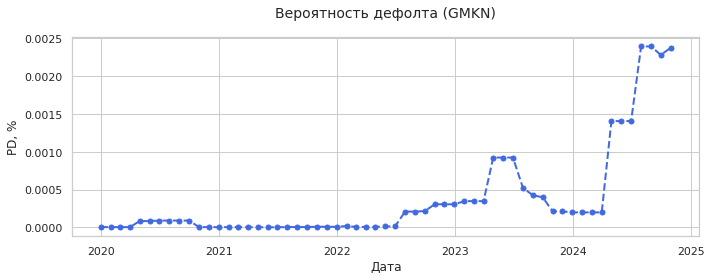

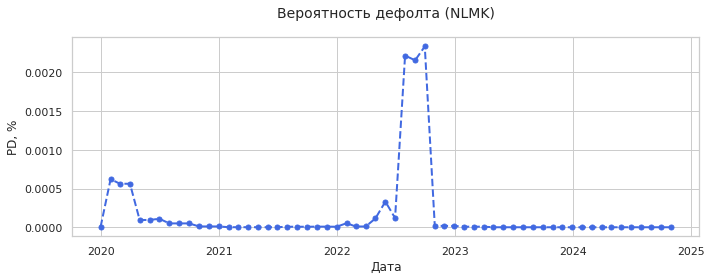

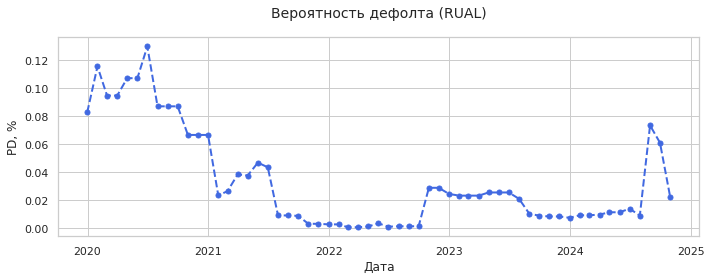

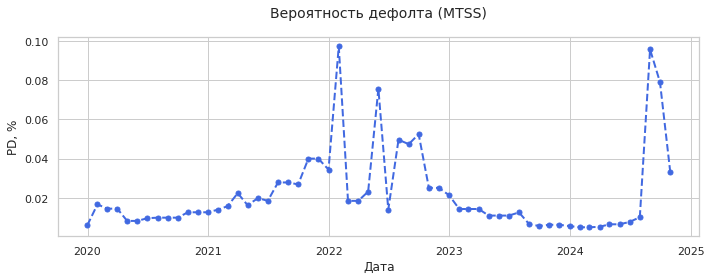

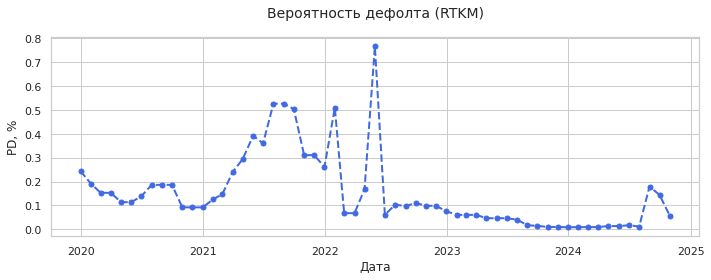

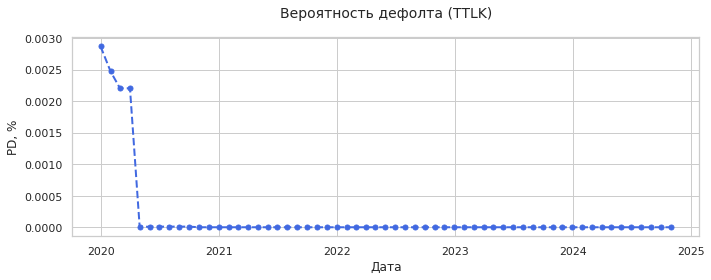

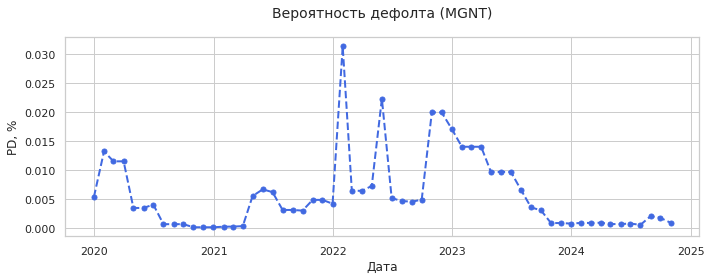

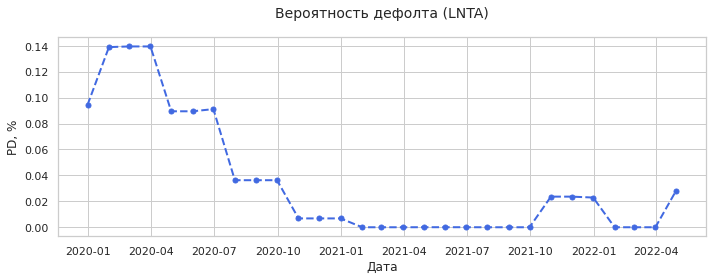

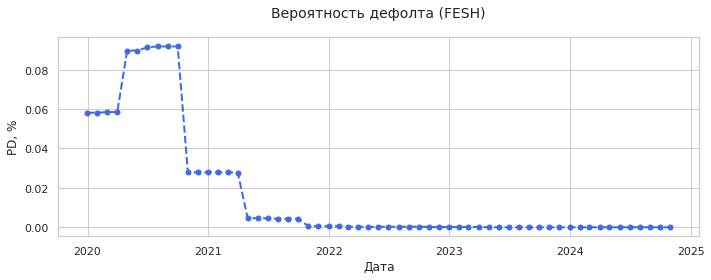

2025-05-01 21:30:45,936:utils.portfolio:INFO: PD graphs saved | Companies: 15 | Path: logs/graphs/


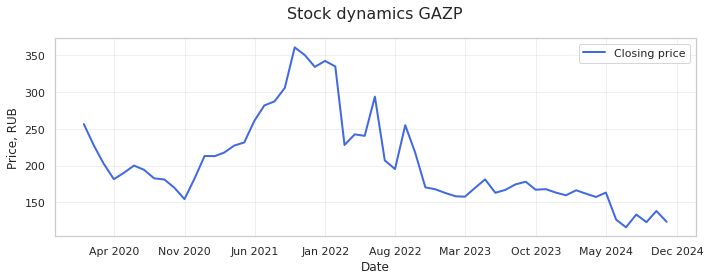

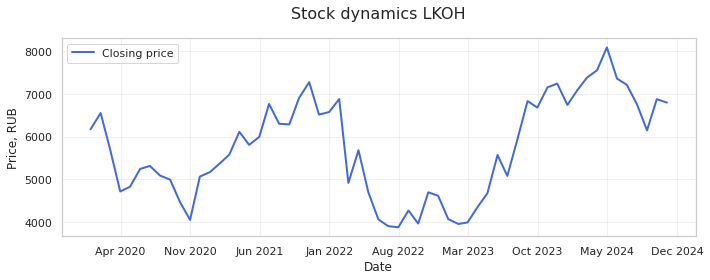

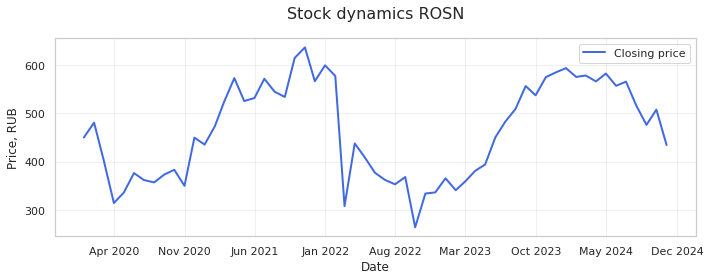

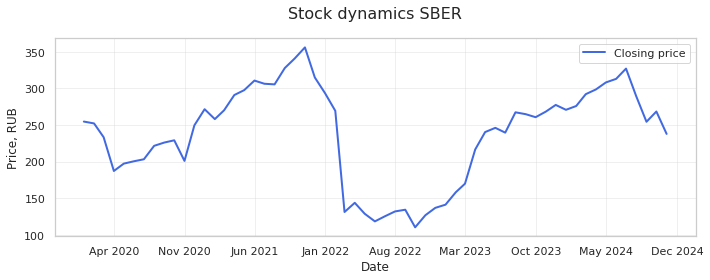

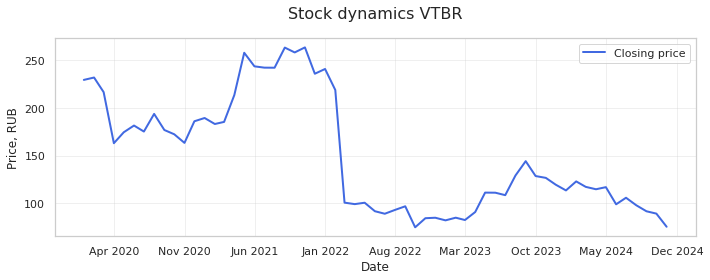

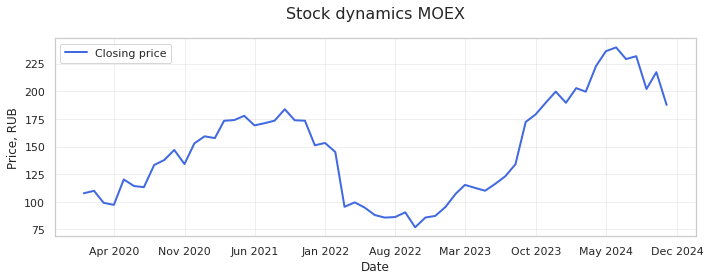

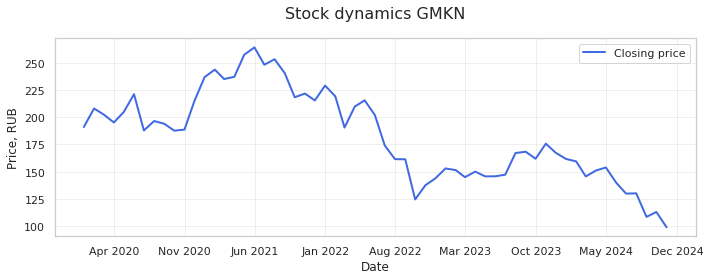

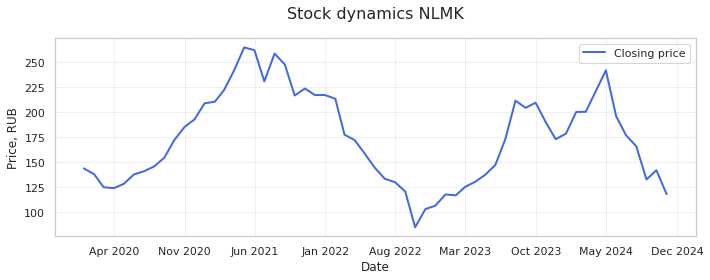

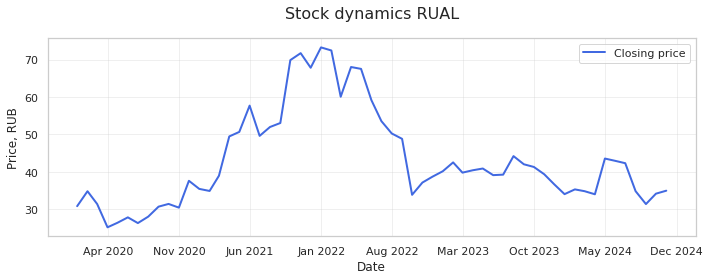

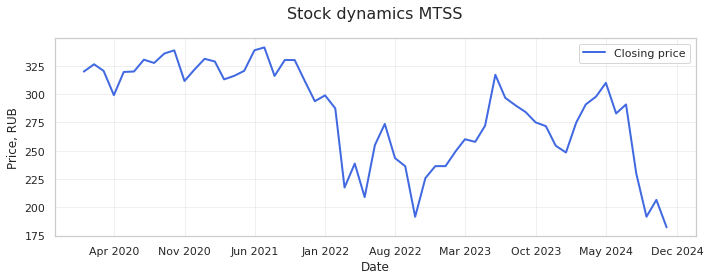

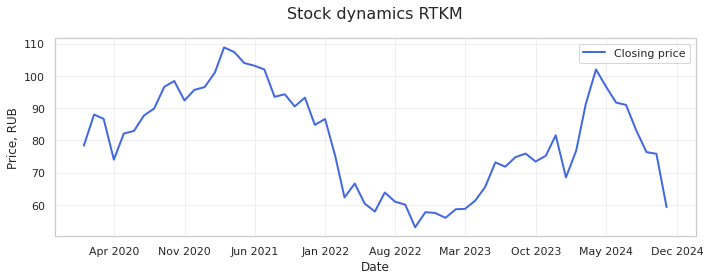

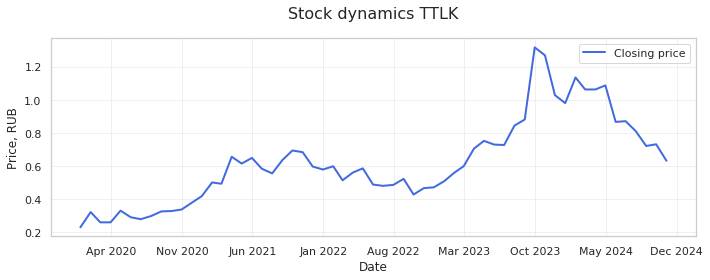

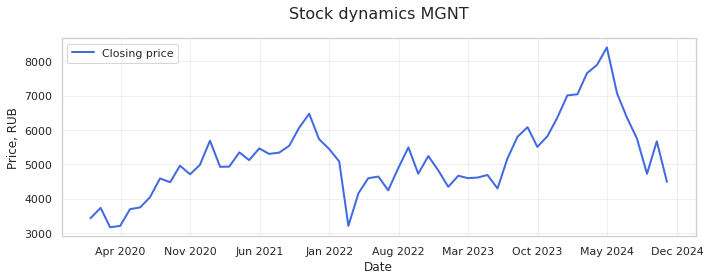

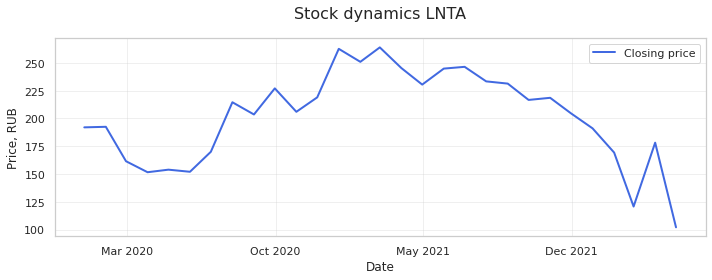

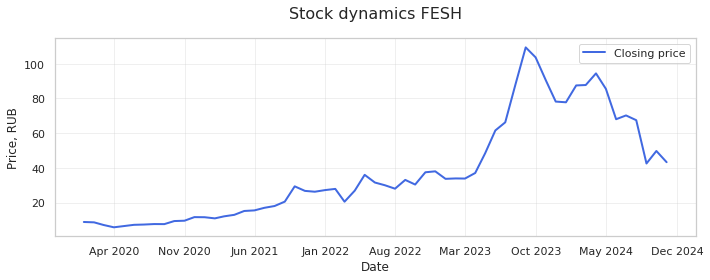

2025-05-01 21:31:00,463:utils.portfolio:INFO: Stock prices graphs saved | Companies: 15 | Path: logs/graphs/


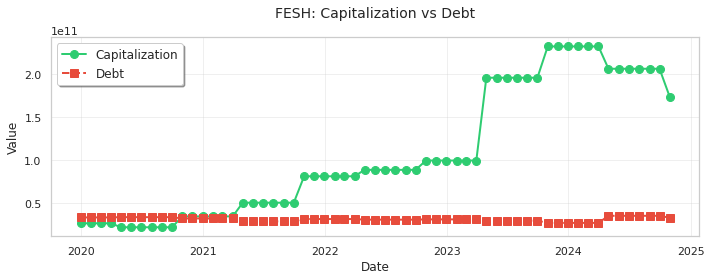

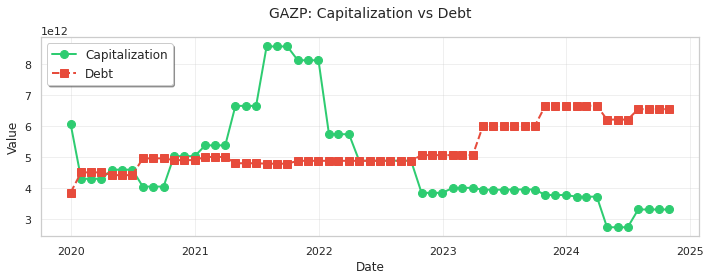

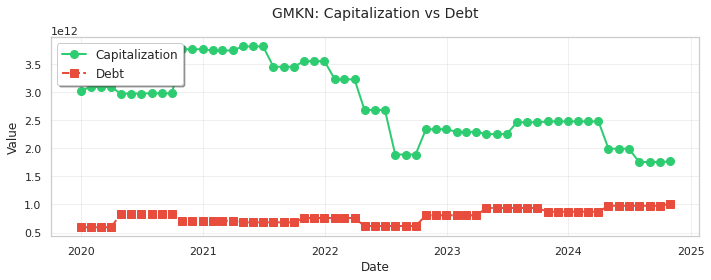

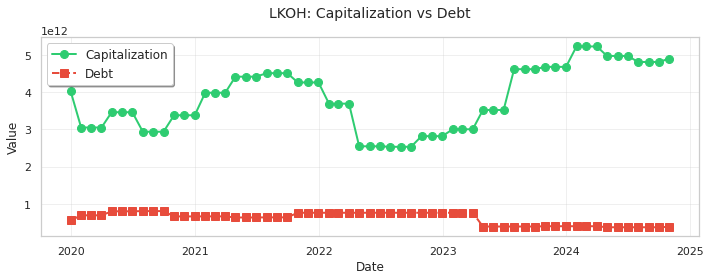

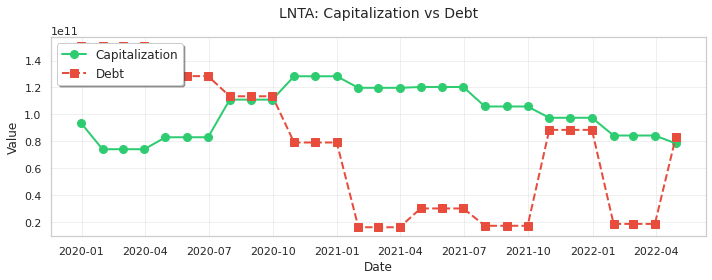

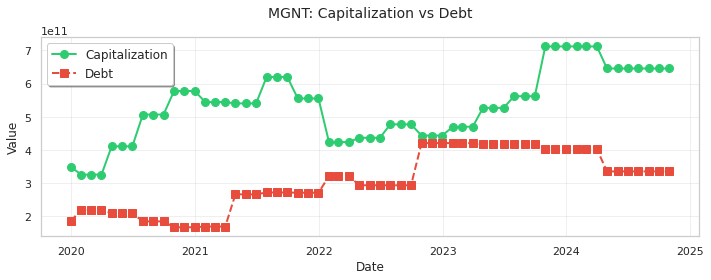

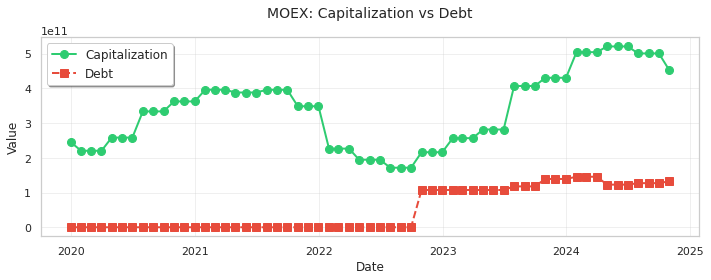

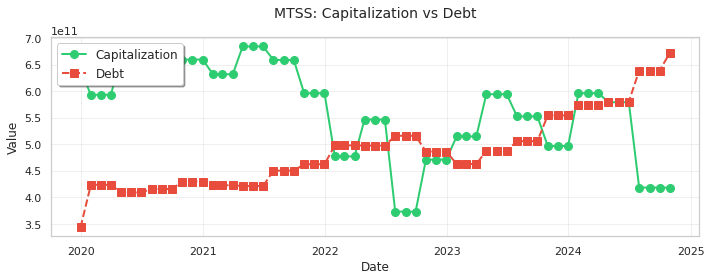

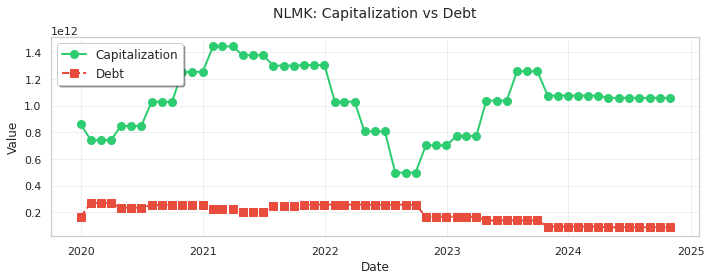

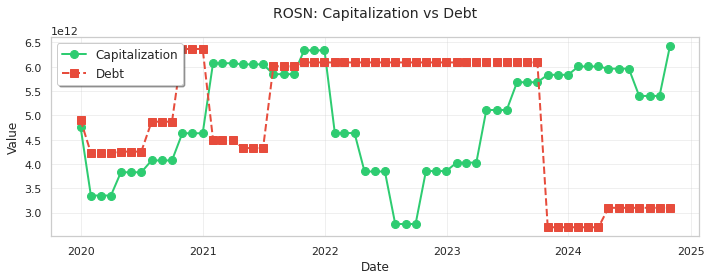

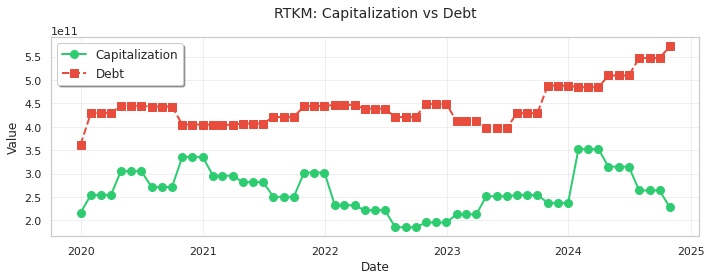

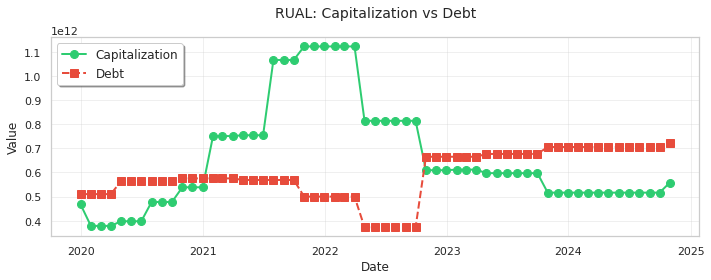

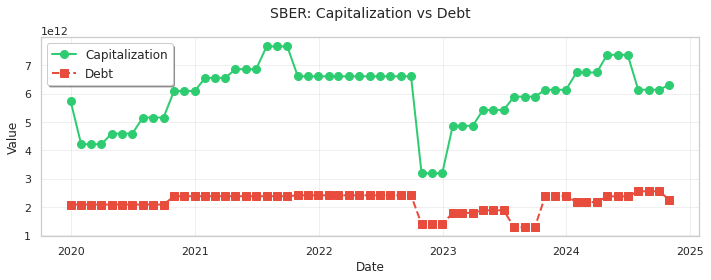

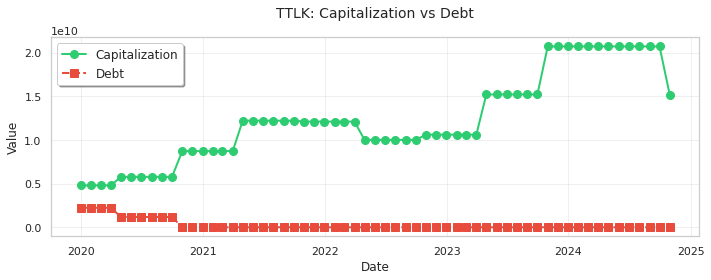

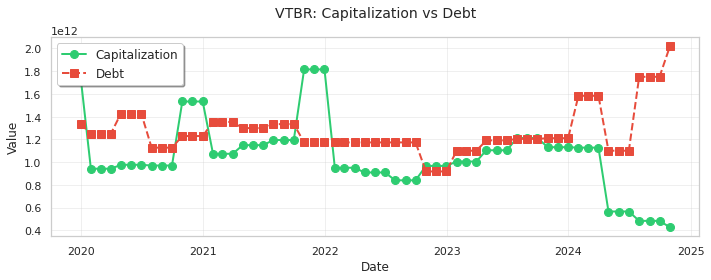

2025-05-01 21:31:16,647:utils.portfolio:INFO: Capitalization-debt graphs saved | Companies: 15 | Path: logs/graphs/debt_catitalization.png
2025-05-01 21:31:16,887:utils.portfolio:INFO: Optimal lag number calculated | Optimal number of lags: 6


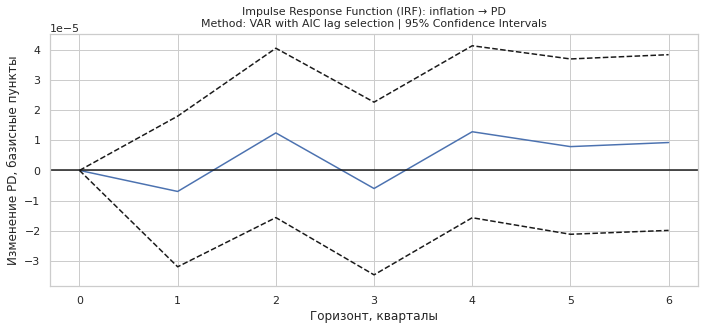

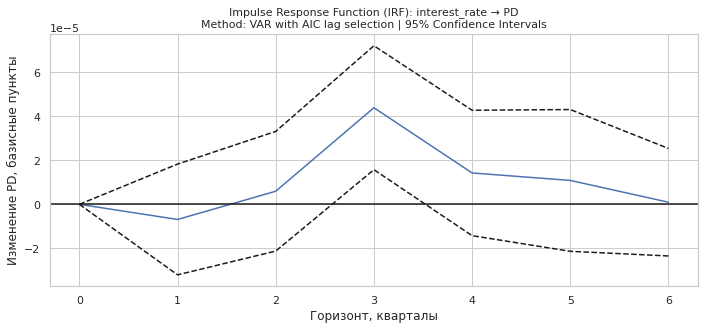

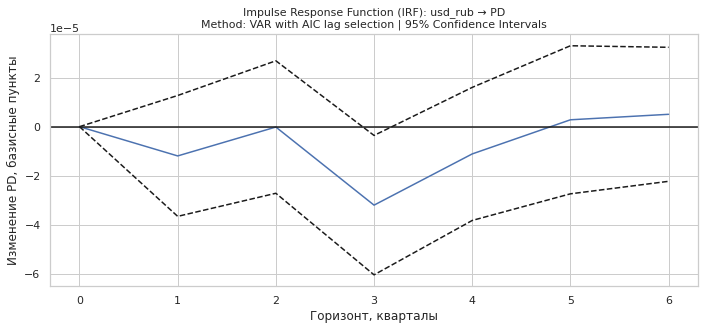

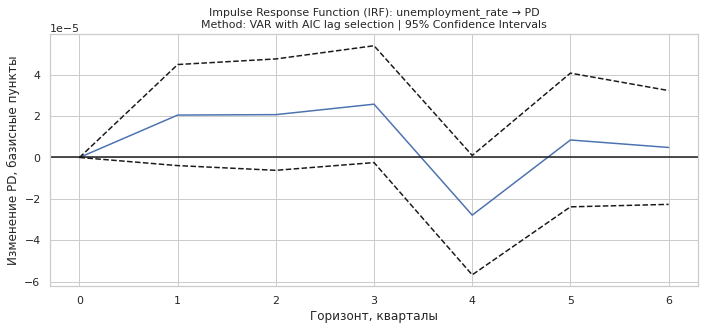

2025-05-01 21:31:18,478:utils.portfolio:INFO: Impulse response functions saved | Path: logs/graphs/
2025-05-01 21:31:20,812:utils.portfolio:INFO: Correlation matrix saved | Path: logs/graphs/corr_matrix.png
2025-05-01 21:32:06,758:utils.portfolio:INFO: Macro connection summary calculated.
2025-05-01 21:32:06,760:utils.portfolio:INFO: ============================================================
2025-05-01 21:32:06,762:utils.portfolio:INFO: ANALYSIS COMPLETED | Duration: 93.2 sec
2025-05-01 21:32:06,763:utils.portfolio:INFO: ============================================================


In [3]:
calc = (
    calc
    .log_system_info()                                        # вывести в лог конфигурацию расчета
    .load_stock_data(                                         # загрузка рыночных данных цен закрытия компаний
        use_backup_data=True,                                 # загружать данные из backup копии
        create_backup=False                                   # обновить backup копию (в случае есть получены новые данные)
    )
    .load_multipliers()                                       # выделить мультипликаторы из МСФО
    .create_portfolio()                                       # создать портфель с загруженными данными
    .adjust_portfolio_data_types()                            # провести настройку форматов дат и типов данных
    .add_macro_data()                                         # загрузить макропараметры
    .fill_missing_values()                                    # обработать пропуски в данных
    .add_dynamic_features()                                   # проставить динамические признаки по дате, например, квартал
    .add_merton_pd()                                          # выполнить расчет вероятности дефолта по формуле Мертона
    .plot_pd_by_tickers(tickers=tickers_list, verbose=True)   # нарисовать графики для вероятностей дефолта
    .plot_stocks(tickers=tickers_list, verbose=True)          # нарисовать динамику котировок акций
    .plot_debt_capitalization(verbose=True)                   # нарисовать динамику долга и стоимости активов
    .calc_irf(impulses_responses = {                          # расчитать функции импульсного отклика
        'inflation': 'PD', 'interest_rate': 'PD', 
        'usd_rub': 'PD', 'unemployment_rate': 'PD'
    }, verbose=True)
    .plot_correlation_matrix(custom_order = [                 # нарисовать матрицу корреляций
        'GAZP', 'LKOH', 'ROSN',                               # Нефтегазовая отрасль
        'SBER', 'VTBR', 'MOEX',                               # Финансовый сектор
        'GMKN', 'NLMK', 'RUAL',                               # Металлургия
        'MTSS', 'RTKM', 'TTLK',                               # Телекоммуникации
        'MGNT', 'LNTA', 'FESH'                                # Розничная торговля
    ], verbose=False)
    .calc_macro_connections()                                 # расчитать регрессию для макропараметров
    .log_completion()                                         # вывести в лог сообщение об окончании расчета
)